In [1]:
import pandas as pd
import numpy as np
#
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
#
import csv
#
import scipy.stats as stats
#
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
#
from sklearn.metrics import classification_report
#
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [2]:
df=pd.read_csv("advertising.csv",sep=",",encoding='utf-8')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Preprocessing

In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# EDA

Text(0, 0.5, 'Sales')

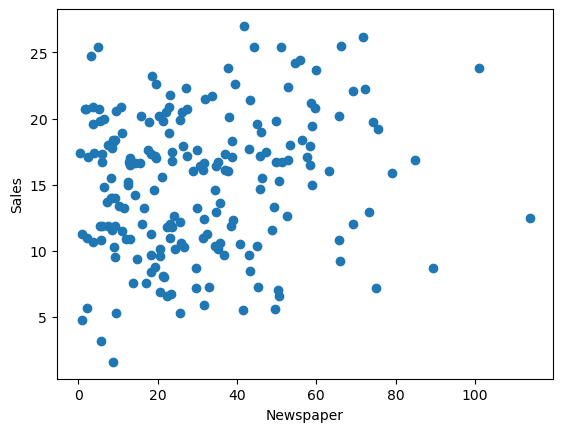

In [7]:
plt.scatter(df['Newspaper'] , df['Sales'])
plt.xlabel ("Newspaper")
plt.ylabel ("Sales")

Text(0, 0.5, 'Sales')

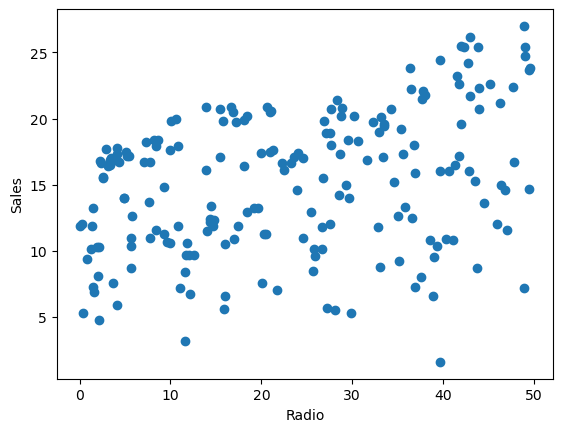

In [8]:
plt.scatter(df['Radio'] , df['Sales'])
plt.xlabel ("Radio")
plt.ylabel ("Sales")

Text(0, 0.5, 'Sales')

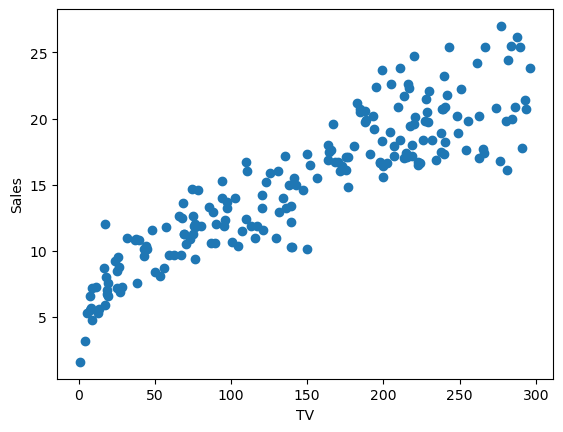

In [9]:
plt.scatter(df['TV'] , df['Sales'])
plt.xlabel ("TV")
plt.ylabel ("Sales")

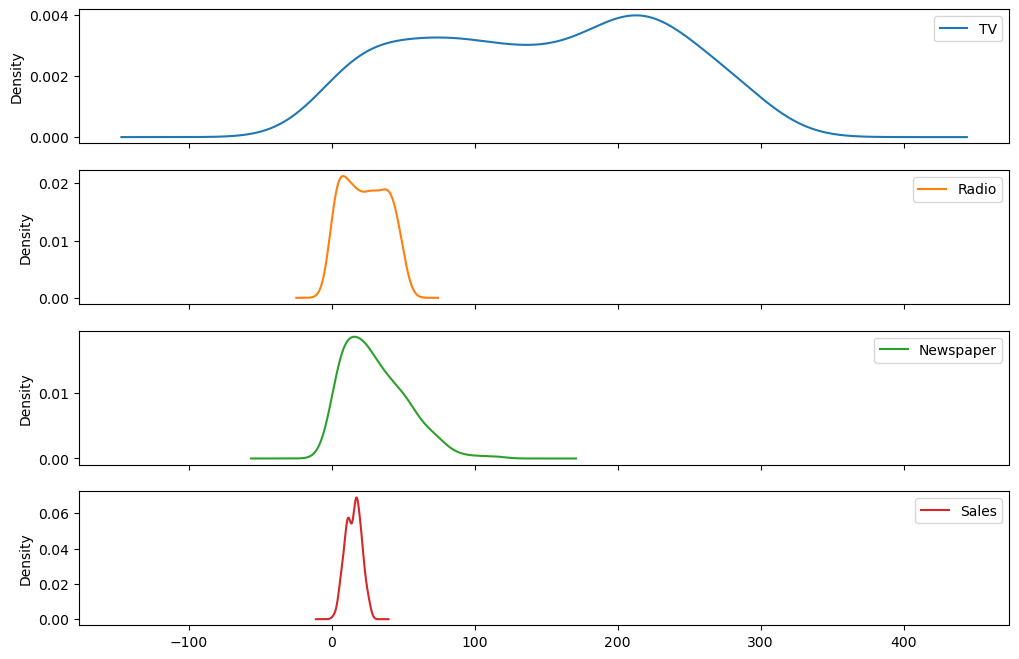

In [10]:
df.plot(kind = "density" , subplots = True , figsize = (12,8) , layout = (4,1))
plt.show()

# Handling Outliers

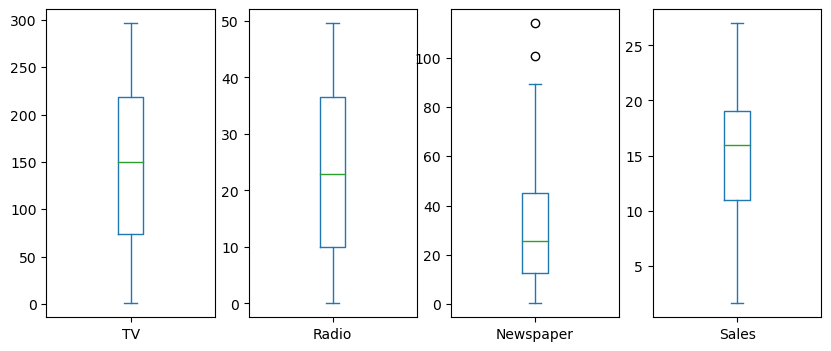

In [11]:
df.plot(kind = "box" , subplots = True , figsize = (10,4) , layout = (1,4))
plt.show()

<AxesSubplot:xlabel='Newspaper'>

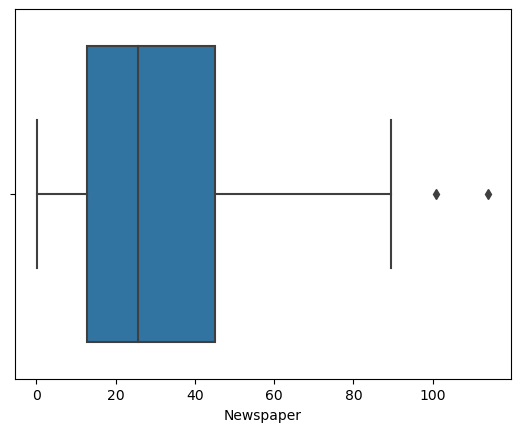

In [12]:
sns.boxplot(x=df['Newspaper'])

In [13]:
print("outliers:" ,
      df[(df['Newspaper']> 100)].count())

outliers: TV           2
Radio        2
Newspaper    2
Sales        2
dtype: int64


In [14]:
df = df[df['Newspaper'] <= 100]
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<AxesSubplot:xlabel='Newspaper'>

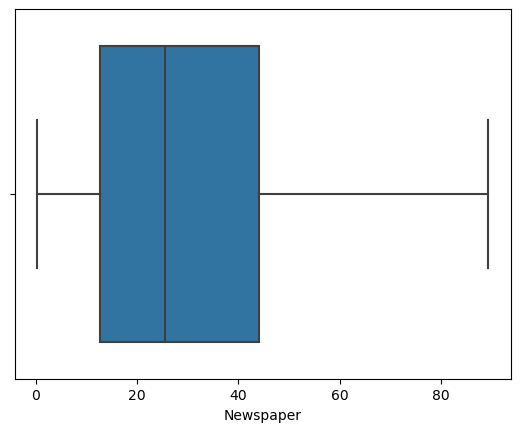

In [15]:
sns.boxplot(x=df['Newspaper'])

<AxesSubplot:>

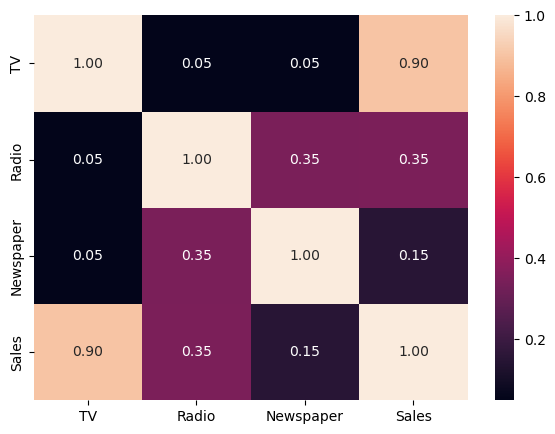

In [16]:
plt.figure(figsize= (7,5))
sns.heatmap(df.corr(),annot=True,fmt = ".2f")

# Feature Selection

In [17]:
for col in df.columns:
    contingency_table = pd.crosstab(df[col],df['Sales'])
    # Apply the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test results for {col}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print(f"Expected frequencies table:\n{expected}\n")

Chi-square test results for TV:
Chi-square statistic: 22454.85
P-value: 0.16926438267730828
Degrees of freedom: 22253
Expected frequencies table:
[[0.00505051 0.00505051 0.00505051 ... 0.00505051 0.00505051 0.00505051]
 [0.00505051 0.00505051 0.00505051 ... 0.00505051 0.00505051 0.00505051]
 [0.00505051 0.00505051 0.00505051 ... 0.00505051 0.00505051 0.00505051]
 ...
 [0.00505051 0.00505051 0.00505051 ... 0.00505051 0.00505051 0.00505051]
 [0.00505051 0.00505051 0.00505051 ... 0.00505051 0.00505051 0.00505051]
 [0.00505051 0.00505051 0.00505051 ... 0.00505051 0.00505051 0.00505051]]

Chi-square test results for Radio:
Chi-square statistic: 19523.899999999998
P-value: 0.4827089883582457
Degrees of freedom: 19516
Expected frequencies table:
[[0.00505051 0.00505051 0.00505051 ... 0.00505051 0.00505051 0.00505051]
 [0.00505051 0.00505051 0.00505051 ... 0.00505051 0.00505051 0.00505051]
 [0.00505051 0.00505051 0.00505051 ... 0.00505051 0.00505051 0.00505051]
 ...
 [0.01010101 0.01010101 0.0

# Split Data

In [18]:
x = df.drop(["Sales","Newspaper"] , axis = 1)
y = df['Sales']

# Scailing Data

In [19]:
sc = StandardScaler()
x= sc.fit_transform(x)

In [20]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state= 42)

In [21]:
print (x.shape)
print (x_train.shape)
print (x_test.shape)

(198, 2)
(148, 2)
(50, 2)


# Modeling

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [23]:
print (rf.score(x_train , y_train))
print (rf.score(x_test , y_test))

0.9913590098136603
0.9616229243452782


In [24]:
y_pred=rf.predict(x_test)
y_pred

array([ 8.7       , 11.41383333, 22.955     , 12.32922778,  5.47      ,
       23.467     , 19.36156456, 12.50865833, 13.5944    , 20.0152    ,
       17.214     , 22.8       ,  5.412     , 12.723425  , 11.82661111,
       11.44379444,  5.321     , 16.5285    ,  9.75497857, 12.88      ,
       13.863     , 17.44306667, 25.012     ,  7.382     , 17.40194048,
       22.165     ,  7.91      , 17.30013333,  7.705     , 15.83825   ,
       18.39917051, 14.786875  , 11.88961111, 13.7075    , 17.42093333,
       21.11      , 19.48608333, 15.90425   , 18.60775266, 17.3914881 ,
       21.975     ,  5.811     , 11.455     , 11.20206667,  7.748     ,
        7.837     , 15.575     , 18.41771667,  8.898     , 25.929     ])

In [25]:
df1=pd.DataFrame({"y_predect":y_pred,"y_test":y_test})
df1

,y_predect,y_test
66,8.700000,11.0
116,11.413833,12.2
17,22.955000,24.4
143,12.329228,10.4
158,5.470000,7.3
128,23.467000,24.7
142,19.361565,20.1
31,12.508658,11.9
19,13.594400,14.6
169,20.015200,20.0


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.881573449938951
Mean Squared Error: 1.163289754953494
Root Mean Squared Error: 1.078559110551431
R-squared: 0.9616229243452782
